In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns

In [2]:

np.random.seed(42)  # random num will be generated
#Create a  Dataset
data={'product_id':range(1,21),
      'product_name':[f'product{i}' for i in range(1,21)],
      'category':np.random.choice(['Electronic','Clothing','Home','Sports'],20),
      'units_sold':np.random.poisson(lam=20,size=20),
      'sales_date':pd.date_range(start='2024-01-01',periods=20,freq='D')
      }
#print(data)
sales_data=pd.DataFrame(data)
print(sales_data)
    
    



    product_id product_name    category  units_sold sales_date
0            1     product1        Home          25 2024-01-01
1            2     product2      Sports          15 2024-01-02
2            3     product3  Electronic          17 2024-01-03
3            4     product4        Home          19 2024-01-04
4            5     product5        Home          21 2024-01-05
5            6     product6      Sports          17 2024-01-06
6            7     product7  Electronic          19 2024-01-07
7            8     product8  Electronic          16 2024-01-08
8            9     product9        Home          21 2024-01-09
9           10    product10    Clothing          21 2024-01-10
10          11    product11        Home          17 2024-01-11
11          12    product12        Home          22 2024-01-12
12          13    product13        Home          14 2024-01-13
13          14    product14        Home          17 2024-01-14
14          15    product15      Sports          17 202

In [26]:
sales_data.to_csv(r"C:\Users\91807\VSCodeProjects\PythonPractice\3.STATISTICS\Sales1.csv",index=False)

In [3]:
#Descriptive Stats
desc_stats=sales_data['units_sold'].describe()
print("Descriptive Stats for Units Sold:")
print(desc_stats)
mean_sales=sales_data['units_sold'].mean()
median_sales=sales_data['units_sold'].median()
mode_sales=sales_data['units_sold'].mode()[0]
variance_sales=sales_data['units_sold'].var()
std_sales=sales_data['units_sold'].std()

print('\nStatistical Analysis ')
print(f'Mean of Units Sold: {mean_sales}')
print(f'mode of Units Sold: {mode_sales}')
print(f'Median of units sold: {median_sales}')
print(f'Standard Deviation of Units Sold: {std_sales}')

print('\n',sales_data.dtypes)

category_stats=sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
print('\n',category_stats)

Descriptive Stats for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis 
Mean of Units Sold: 18.8
mode of Units Sold: 17
Median of units sold: 18.5
Standard Deviation of Units Sold: 3.302311789927586

 product_id               int64
product_name            object
category                object
units_sold               int32
sales_date      datetime64[ns]
dtype: object

      category  sum       mean       std
0    Clothing   21  21.000000       NaN
1  Electronic   73  18.250000  2.217356
2        Home  181  20.111111  3.723051
3      Sports  101  16.833333  2.714160


In [4]:
print('Count: ',sales_data['units_sold'].count())
print('sum: ',sales_data['units_sold'].sum())
print('Avg: ',sales_data['units_sold'].mean())
# To find Mean Manually
sum=0
for i in sales_data['units_sold']:
    sum=sum+i
avg=sum / sales_data['units_sold'].count()
print('Average is : ',avg)

#to find variance and Standard Deviation manually
var1=0
for i in sales_data['units_sold']:
    var1=var1 + np.square(i-avg)
var2=var1/sales_data['units_sold'].count()-1
print('Variance Is: ',var2)
std1=np.sqrt(var2)
print('Standard Deviation is: ',std1)


    

Count:  20
sum:  376
Avg:  18.8
Average is :  18.8
Variance Is:  9.360000000000003
Standard Deviation is:  3.0594117081556713


)

In [5]:
skewness=sc.skew(sales_data['units_sold'])
print('Auto Skew: ',skewness)
#Skewness Manually
sk1=0
sk2=0
for i in sales_data['units_sold']:
    sk1=sk1 + ((i-avg) ** 3 )
    sk2=sk2+np.square(i-avg)

print(f'Cube: {sk1},Square : {sk2}')
skewness1= (1/20*sk1)/(np.sqrt(1/19*sk2))**3
print('Manual Skew: ',skewness1)


    
    

Auto Skew:  0.22563639572360109
Cube: 150.47999999999962,Square : 207.20000000000007
Manual Skew:  0.20892699685307795


In [7]:
#Inferential Statistics
confidnce_level=0.95
degrees_freedom=len(data['units_sold'])-1  # Sample n-1

sample_mean=mean_sales
sample_standard_error=std_sales/np.sqrt(len(data['units_sold']))
t_score=sc.t.ppf((1+confidnce_level)/2,degrees_freedom)
margin_error=t_score*sample_standard_error
confidnce_level=(sample_mean-margin_error,sample_mean+margin_error)
print("\n Confidence Interval of Mean of Unit Sold: ")
print(confidnce_level)




 Confidence Interval of Mean of Unit Sold: 
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [8]:
t_statisstics,p_value=sc.ttest_1samp(data['units_sold'],20)
print("\n Hypothis Testing(t-test):")
print(f"T-statisstatic:{t_statisstics},p_value:{p_value}")
if p_value < 0.05:
    print("Reject null Hypothesis")
else:
    print("Accept null hypothesis")
    


 Hypothis Testing(t-test):
T-statisstatic:-1.6250928099424466,p_value:0.12061572226781002
Accept null hypothesis


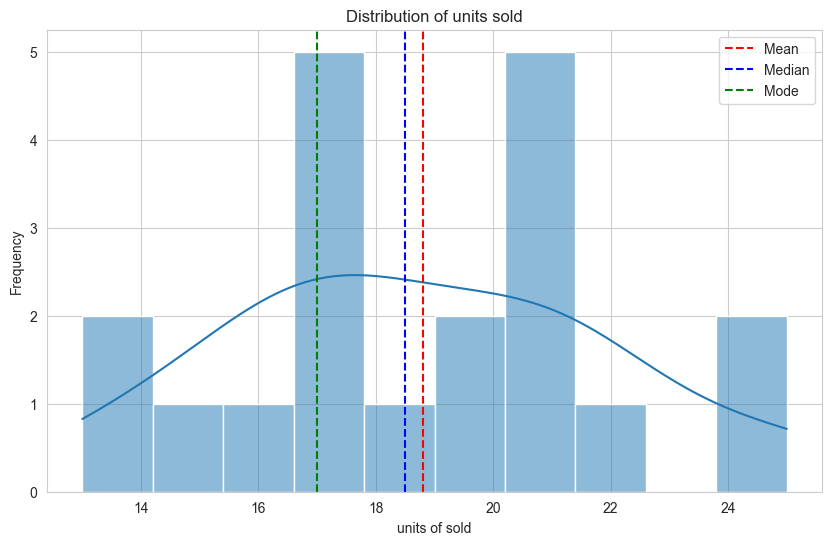

In [9]:
#Visualization
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(data['units_sold'],bins=10,kde=True)
plt.title('Distribution of units sold')
plt.xlabel('units of sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales,color='red',linestyle='--',label='Mean')
plt.axvline(median_sales,color='blue',linestyle='--',label='Median')
plt.axvline(mode_sales,color='green',linestyle='--',label='Mode')
plt.legend()
plt.show()

